<a href="https://colab.research.google.com/github/Ryan-spec/Portfolio-Projects/blob/master/Basic_Time_Series_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Basic Plotting

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from pandas.util.testing import assert_frame_equal 

In [40]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG (1).csv


In [41]:
# Load the data into a dataframe and view the first 5 rows
df = pd.read_csv('GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-24,1119.609985,1122.000000,1111.010010,1115.520020,1115.520020,1395600
1,2019-06-25,1112.660034,1114.349976,1083.800049,1086.349976,1086.349976,1546900
2,2019-06-26,1086.500000,1092.969971,1072.239990,1079.800049,1079.800049,1810900
3,2019-06-27,1084.000000,1087.099976,1075.290039,1076.010010,1076.010010,1004300
4,2019-06-28,1076.390015,1081.000000,1073.369995,1080.910034,1080.910034,1693200


In [42]:
df.drop(['Adj Close', 'Volume'], axis=1, inplace=True)

In [43]:
df.head()

,Date,Open,High,Low,Close
0,2019-06-24,1119.609985,1122.000000,1111.010010,1115.520020
1,2019-06-25,1112.660034,1114.349976,1083.800049,1086.349976
2,2019-06-26,1086.500000,1092.969971,1072.239990,1079.800049
3,2019-06-27,1084.000000,1087.099976,1075.290039,1076.010010
4,2019-06-28,1076.390015,1081.000000,1073.369995,1080.910034


In [44]:
# Add a new column 
df['Ticks'] = range(0, len(df.index.values))

In [45]:
df.head()

,Date,Open,High,Low,Close,Ticks
0,2019-06-24,1119.609985,1122.000000,1111.010010,1115.520020,0
1,2019-06-25,1112.660034,1114.349976,1083.800049,1086.349976,1
2,2019-06-26,1086.500000,1092.969971,1072.239990,1079.800049,2
3,2019-06-27,1084.000000,1087.099976,1075.290039,1076.010010,3
4,2019-06-28,1076.390015,1081.000000,1073.369995,1080.910034,4


### Plotting Ticks vs Open Price

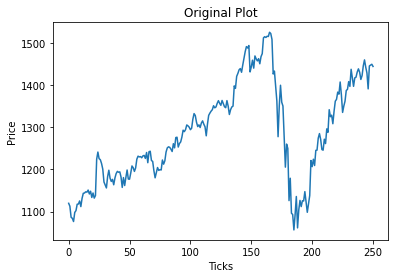

In [46]:
# Simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'Open', data =df)


In [47]:
# Sample a 10th of the data
one_tenth = df.sample(frac= .1, random_state=np.random.randint(10))
one_tenth.head()

,Date,Open,High,Low,Close,Ticks
33,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,33
214,2020-04-29,1341.459961,1359.989990,1325.339966,1341.479980,214
39,2019-08-19,1190.089966,1206.989990,1190.089966,1198.449951,39
6,2019-07-02,1102.239990,1111.770020,1098.170044,1111.250000,6
101,2019-11-14,1297.500000,1317.000000,1295.650024,1311.459961,101


The date values have now mixed up which will be difficult to plot so we will re-order them by ticks value.

In [48]:
# Sorting the dataframe
one_tenth.index.name = None
one_tenth = one_tenth.sort_values(by=['Ticks'], ascending=[True])
one_tenth.head()

,Date,Open,High,Low,Close,Ticks
6,2019-07-02,1102.239990,1111.770020,1098.170044,1111.250000,6
11,2019-07-10,1131.219971,1142.050049,1130.969971,1140.479980,11
33,2019-08-09,1197.989990,1203.880005,1183.603027,1188.010010,33
39,2019-08-19,1190.089966,1206.989990,1190.089966,1198.449951,39
43,2019-08-23,1181.989990,1194.079956,1147.750000,1151.290039,43


### Plot the Ticks vs Open Price on the Sampled Data

Text(0, 0.5, 'Price')

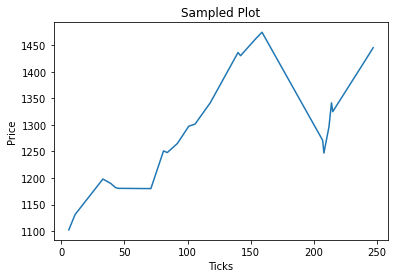

In [49]:
axes = one_tenth.plot('Ticks', 'Open', legend=False, title= 'Sampled Plot')
axes.legend=None
axes.set_ylabel('Price')

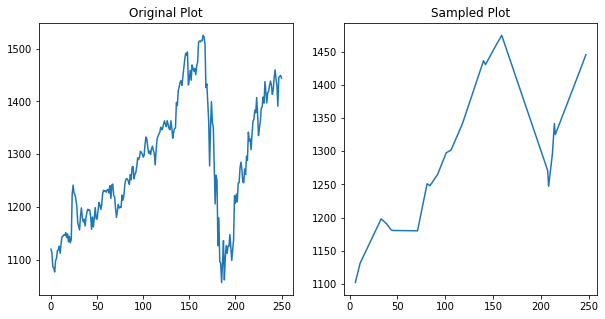

In [50]:
# Plotting the Original Data vs Sampled Data

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5));
axes[0].plot('Ticks', 'Open', data = df);
axes[0].set_title('Original Plot');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Sampled Plot');


### Plotting the Original Data vs the Sampled Data vs the Rolling Mean

In [51]:
# Getting the Rolling Mean
df['Rolling_Mean'] = df['Open'].rolling(window = 80).mean()

In [52]:
df.head()

,Date,Open,High,Low,Close,Ticks,Rolling_Mean
0,2019-06-24,1119.609985,1122.000000,1111.010010,1115.520020,0,NaN
1,2019-06-25,1112.660034,1114.349976,1083.800049,1086.349976,1,NaN
2,2019-06-26,1086.500000,1092.969971,1072.239990,1079.800049,2,NaN
3,2019-06-27,1084.000000,1087.099976,1075.290039,1076.010010,3,NaN
4,2019-06-28,1076.390015,1081.000000,1073.369995,1080.910034,4,NaN


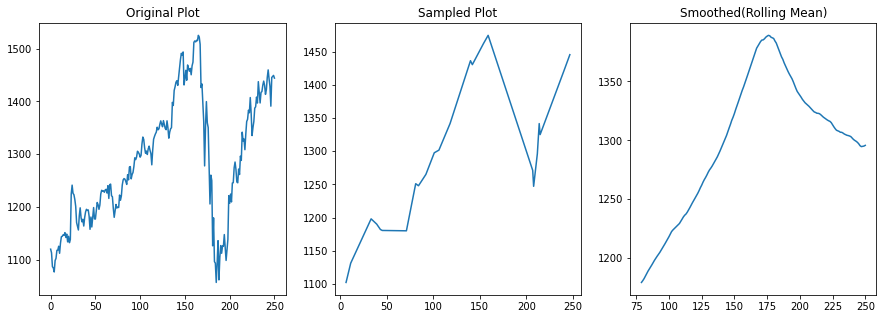

In [53]:
# Plotting the Original Data vs Sampled Data vs Rolling Mean

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5));
axes[0].plot('Ticks', 'Open', data = df);
axes[0].set_title('Original Plot');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Sampled Plot');
axes[2].plot('Ticks', 'Rolling_Mean', data = df);
axes[2].set_title('Smoothed(Rolling Mean)');

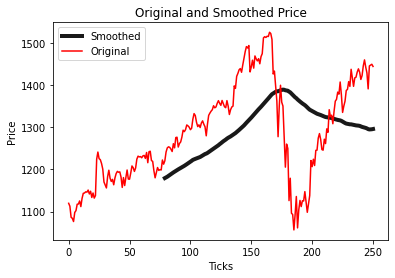

In [56]:
# Plotting Original Data and Smoothed Data on the same set
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(df['Ticks'], df['Rolling_Mean'], color=(0,0,0), linewidth=4, alpha=.9, label='Smoothed');
ax.plot(df['Ticks'], df['Open'], color=(1,0,0), label='Original');
ax.set_title('Original and Smoothed Price')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend()

In [58]:
# Plotting Date works best with datetime as the type
type(df['Date'].values[0])
np.datetime64

numpy.datetime64

In [60]:
df.shape

(251, 7)

In [61]:
# Get the data from Tick 800 to 1200

filt_df = df[(df['Ticks'] >= 100) & (df['Ticks'] <= 250)]
filt_df.head()

,Date,Open,High,Low,Close,Ticks,Rolling_Mean
100,2019-11-13,1294.069946,1304.300049,1293.510010,1298.000000,100,1218.163501
101,2019-11-14,1297.500000,1317.000000,1295.650024,1311.459961,101,1220.233501
102,2019-11-15,1318.939941,1334.880005,1314.280029,1334.869995,102,1222.497501
103,2019-11-18,1332.219971,1335.529053,1317.500000,1320.699951,103,1223.849750
104,2019-11-19,1327.699951,1327.699951,1312.800049,1315.459961,104,1224.932874


### Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression().fit(filt_df[['Ticks']], filt_df[['Rolling_Mean']])
m = model.coef_[0]
b = model.intercept_

# Equation of the line
print ('y = ', round(m[0],2), 'x + ', round(b[0],2))

y =  0.5 x +  1226.6


In [66]:
# Using the Eqn of the line to get the y values
predictions = model.predict(filt_df[['Ticks']])
predictions[0:5]

array([[1276.23447274],
       [1276.73083987],
       [1277.227207  ],
       [1277.72357413],
       [1278.21994126]])

In [67]:
# Make a DataFrame for the Predictions
predictions = pd.DataFrame(data= predictions, index = filt_df.index.values, columns=['Pred'])
predictions.head()

,Pred
100,1276.234473
101,1276.730840
102,1277.227207
103,1277.723574
104,1278.219941


In [68]:
# Join the two DataFrames

joined_df = filt_df.join(predictions, how='inner')
joined_df.head()

,Date,Open,High,Low,Close,Ticks,Rolling_Mean,Pred
100,2019-11-13,1294.069946,1304.300049,1293.510010,1298.000000,100,1218.163501,1276.234473
101,2019-11-14,1297.500000,1317.000000,1295.650024,1311.459961,101,1220.233501,1276.730840
102,2019-11-15,1318.939941,1334.880005,1314.280029,1334.869995,102,1222.497501,1277.227207
103,2019-11-18,1332.219971,1335.529053,1317.500000,1320.699951,103,1223.849750,1277.723574
104,2019-11-19,1327.699951,1327.699951,1312.800049,1315.459961,104,1224.932874,1278.219941


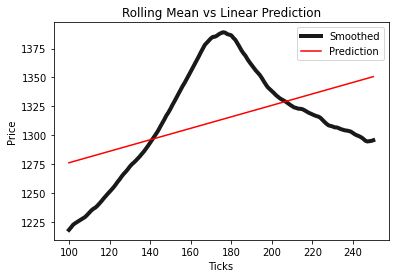

In [69]:
# Plot the data 

fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(joined_df['Ticks'], joined_df['Rolling_Mean'], color=(0,0,0), linewidth=4, alpha=.9, label='Smoothed');
ax.plot(joined_df['Ticks'], joined_df['Pred'], color=(1,0,0), label='Prediction');
ax.set_title('Rolling Mean vs Linear Prediction')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend()

In [71]:
# Get the R-Squared value
import sklearn
r_squared = sklearn.metrics.r2_score(joined_df['Rolling_Mean'], joined_df['Pred'], multioutput='uniform_average')
r_squared

0.21751335132377936

This is a poor model choice, rubbish, trash. Have to dump it.